**2. Построение скелета бинарного изображения** <br>
Разработать программу построения скелета бинарного изображения на основе преобразований утоньшения.

Содержание отчета: <br>
&emsp;Исходные изображения <br>
&emsp;Код программы (для Jupiter Notebook) <br>
&emsp;Результат работы программы <br>

**3. Построение выпуклой оболочки** <br>
Разработать программу построения построения выпуклой оболочки бинарного объекта на основе преобразований утолщения.

Содержание отчета: <br>
&emsp;Исходные изображения <br>
&emsp;Код программы (для Jupiter Notebook) <br>
&emsp;Результат работы программы <br>

In [42]:
# Импорт необходимых библиотек
import cv2
import numpy as np
import matplotlib as mpl
import os
from matplotlib import pyplot as plt
from scipy.ndimage import binary_dilation, binary_erosion
%matplotlib inline

# Настройка параметров для вывода изображений
mpl.rcParams['image.cmap'] = 'copper'
mpl.rcParams['figure.figsize'] = [20, 10]
mpl.rcParams["image.interpolation"] = None


C:\Users\kwx1191923\AppData\Local\Temp\ipykernel_17840\3572160223.py:13: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams["image.interpolation"] = None


In [46]:
# Операция нахождения симметричного множества
# Так как в текущих задачах начало координат содержится в центральном элементе, то можно просто повернуть на 180 градусов
def symmetric(b):
    return cv2.rotate(b, cv2.ROTATE_180)


# Операция та самая
def target_op(x, t):
    a = np.zeros(t.shape, np.uint8)
    b = np.zeros(t.shape, np.uint8)
    a[t == 0] = 1
    b[t == 1] = 1

    result_part1 = binary_erosion(x, a).astype(x.dtype)
    result_part2 = binary_dilation(x, symmetric(b)).astype(x.dtype)
    result = cv2.subtract(result_part1, result_part2)

    return result


# Операция утоньшения
def thinning(x, t):
    return cv2.subtract(x, target_op(x, t))

# Операция утолщения
def thickenning(x, t):
    return cv2.bitwise_or(x, target_op(x, t))


In [48]:
def skeleton(orig_img):
    # Ввод структурирующих элементов
    kernels = []
    kernels.append(np.array([[0, 0, 0],
                            [2, 0, 2],
                            [1, 1, 1]]))
    for i in range(3):
        kernels.append(cv2.rotate(kernels[-1], cv2.ROTATE_90_CLOCKWISE))
    kernels.append(np.array([[2, 0, 2],
                            [1, 0, 0],
                            [1, 1, 2]]))
    for i in range(3):
        kernels.append(cv2.rotate(kernels[-1], cv2.ROTATE_90_CLOCKWISE))

    img = orig_img.copy()

    # Сам алгоритм
    while True:
        prev = img.copy()
        for kernel in kernels:
            img = thinning(img, kernel)
        if np.array_equal(prev, img):
            break

    # Вывод результатов
    f, out = plt.subplots(1, 2)
    out[0].set_title("Original image")
    out[0].axis("off")
    out[0].imshow(orig_img)

    out[1].set_title("Its skelet")
    out[1].axis("off")
    out[1].imshow(img)
    plt.show()


**Start point**

In [49]:
# Get image names
directory = "binary_images"
files = []

for filename in os.listdir(directory):
    files.append(os.path.join(directory, filename))


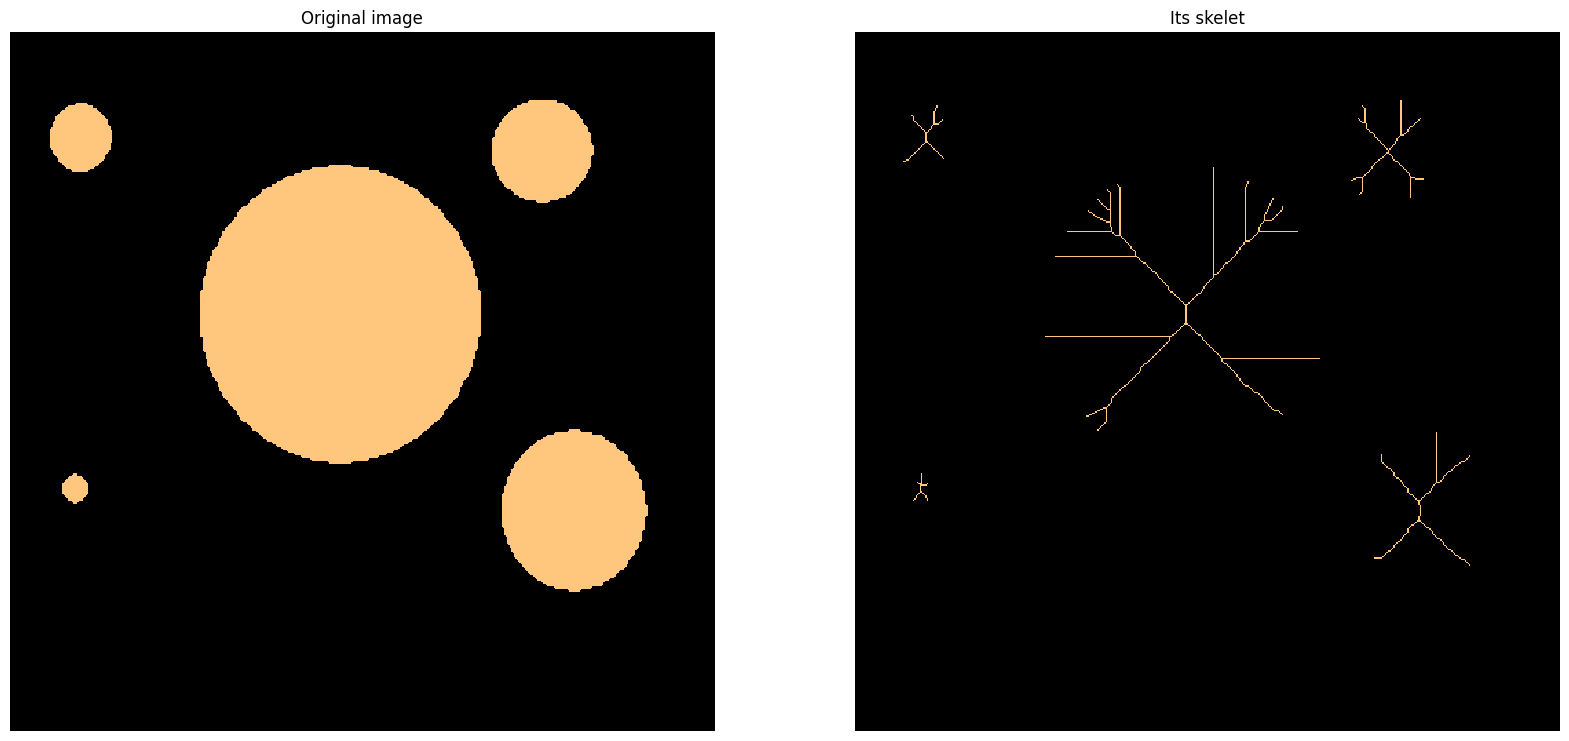

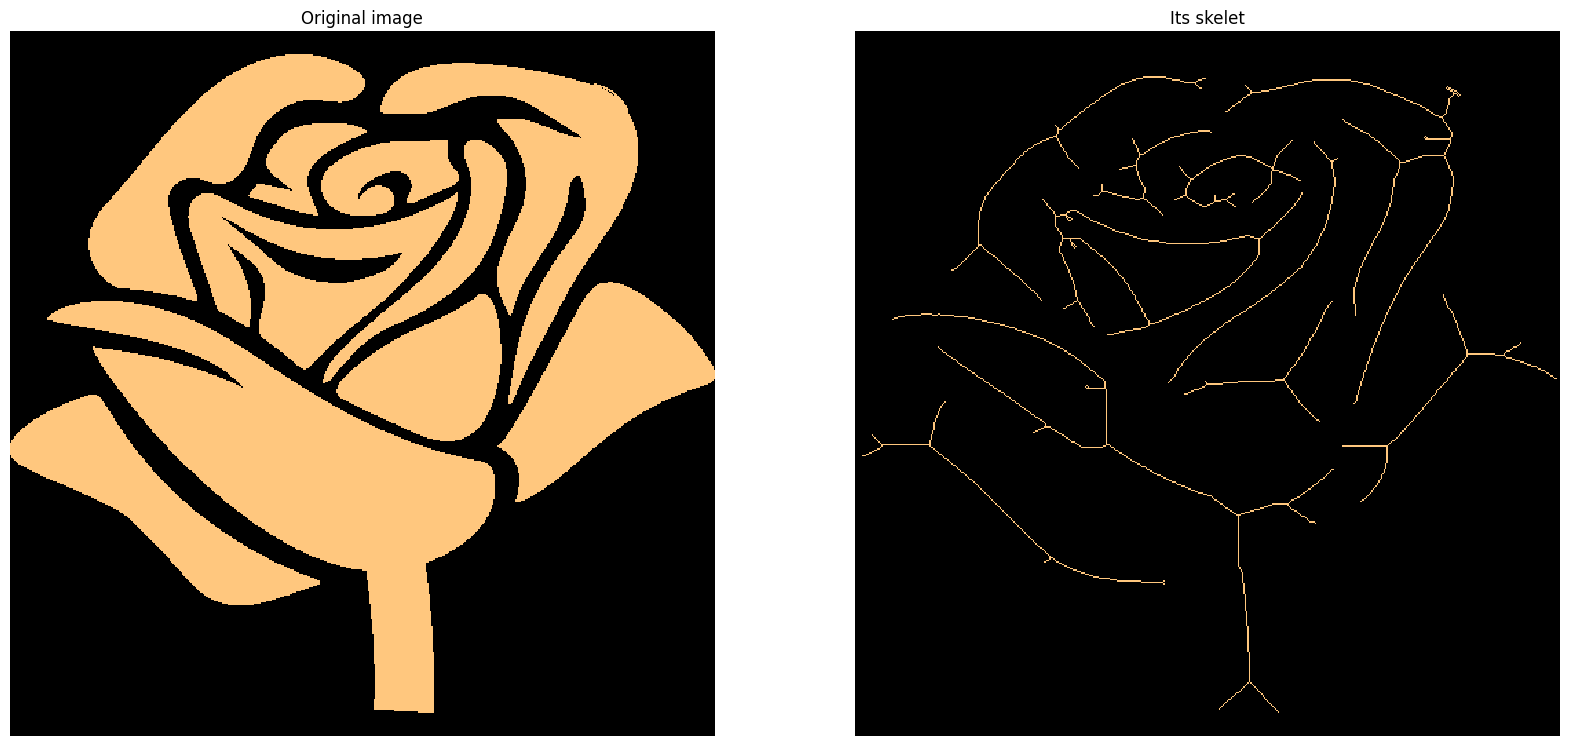

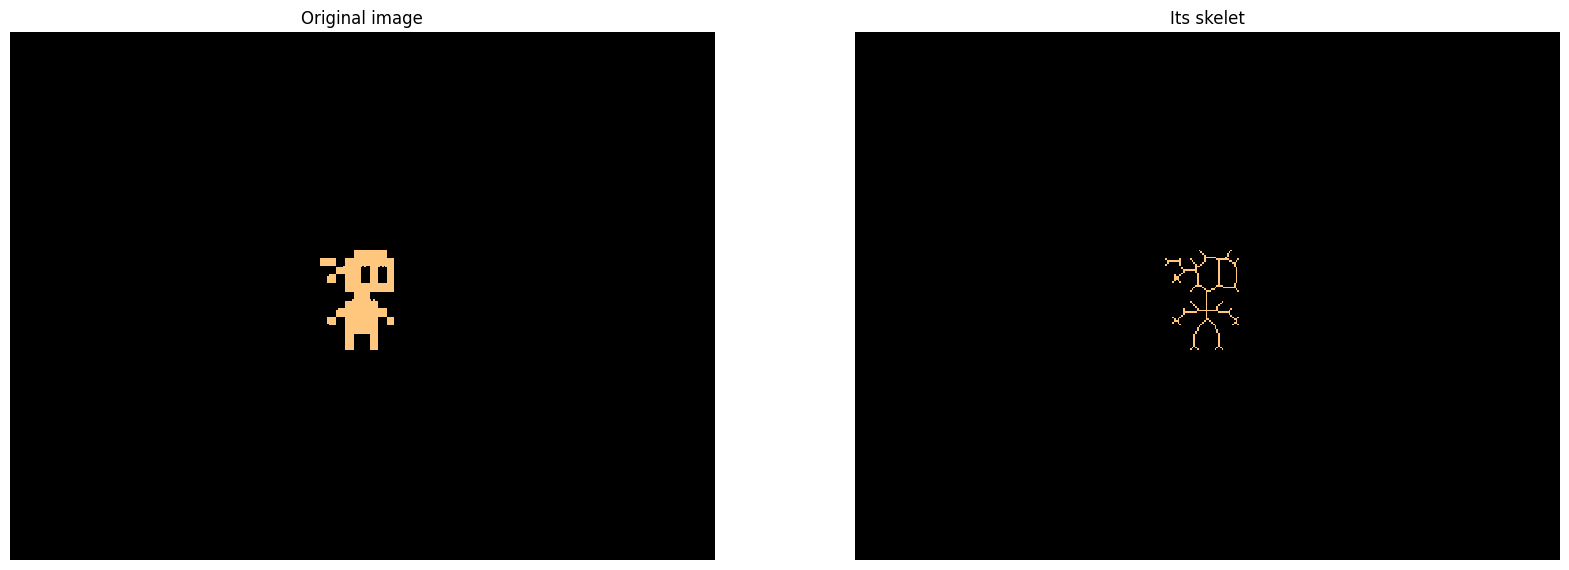

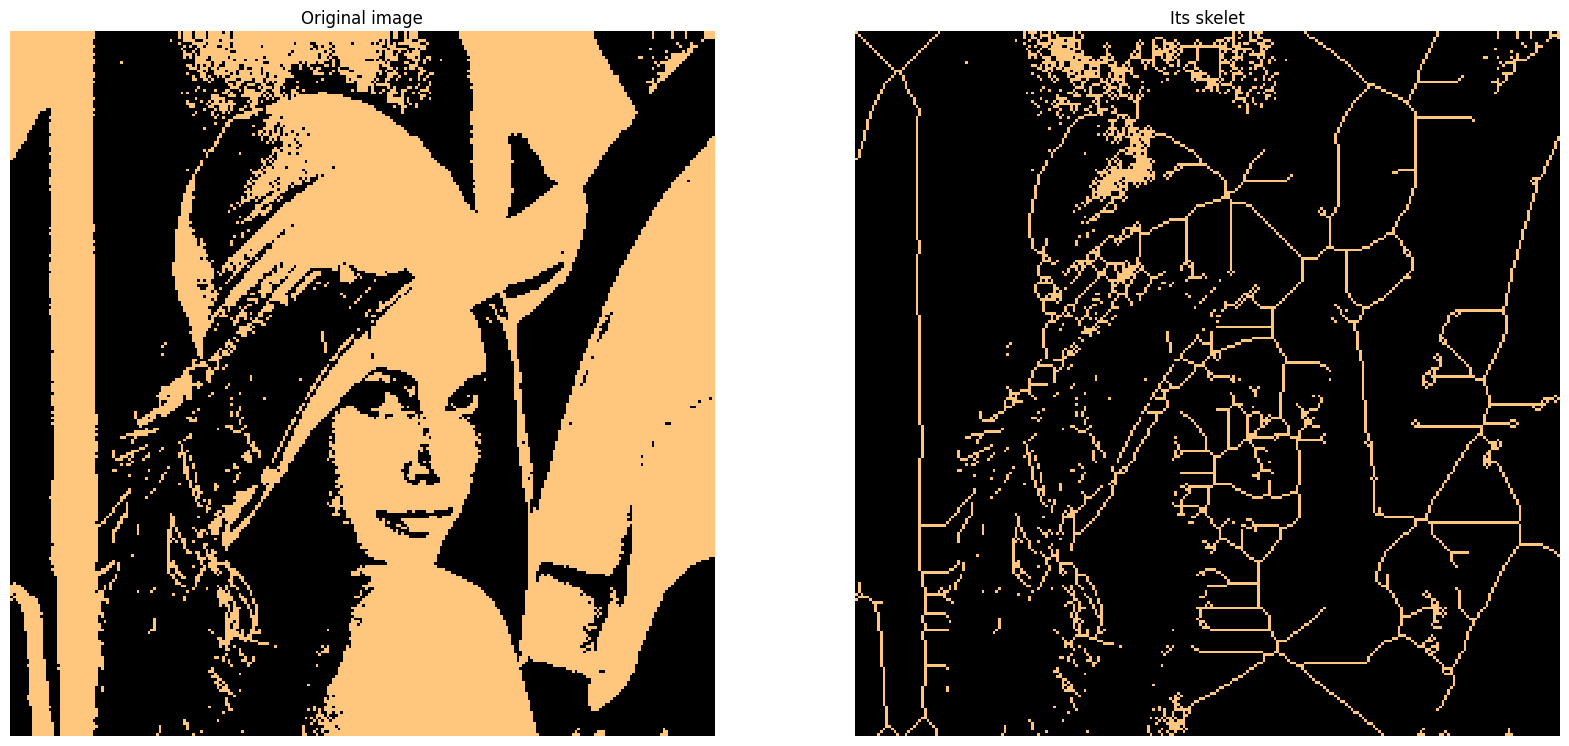

In [50]:
for file in files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img[img == 255] = 1
    skeleton(img)


In [51]:
def convex_hull(orig_img):
    # Ввод структурирующих элементов
    kernels = []
    kernels.append(np.array([[0, 0, 0],
                            [2, 1, 0],
                            [2, 2, 2]]))

    for i in range(3):
        kernels.append(cv2.rotate(kernels[-1], cv2.ROTATE_90_CLOCKWISE))

    kernels.append(np.array([[0, 0, 0],
                            [0, 1, 2],
                            [2, 2, 2]]))

    for i in range(3):
        kernels.append(cv2.rotate(kernels[-1], cv2.ROTATE_90_CLOCKWISE))

    img = orig_img.copy()

    # Сам алгоритм
    while True:
        prev = img.copy()
        for kernel in kernels:
            img = thickenning(img, kernel)
        if np.array_equal(prev, img):
            break

    # Вывод результатов
    f, out = plt.subplots(1, 2)
    out[0].set_title("Original image")
    out[0].axis("off")
    out[0].imshow(orig_img)

    out[1].set_title("Its convex hull")
    out[1].axis("off")
    out[1].imshow(img, vmin=0, vmax=1)
    plt.show()


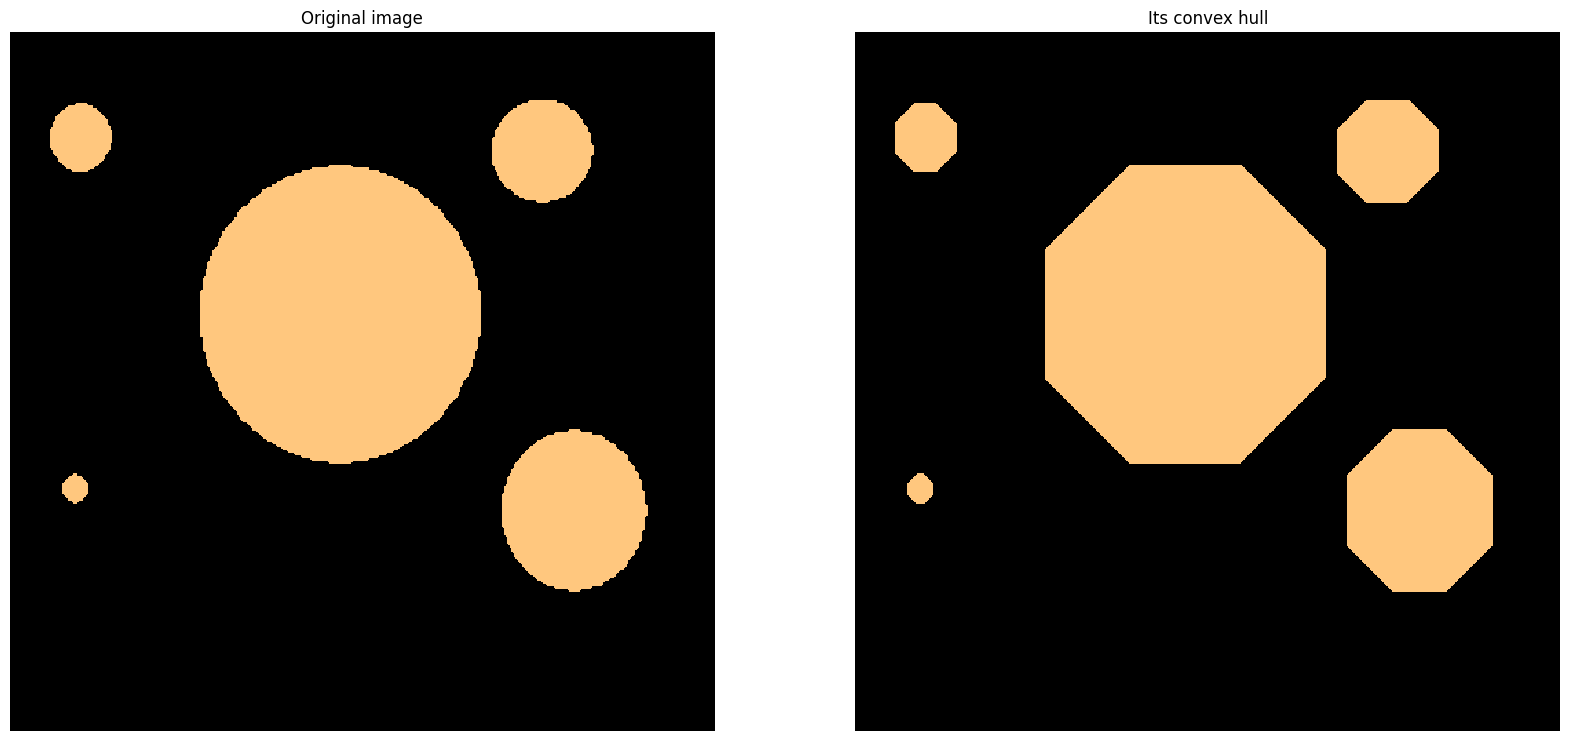

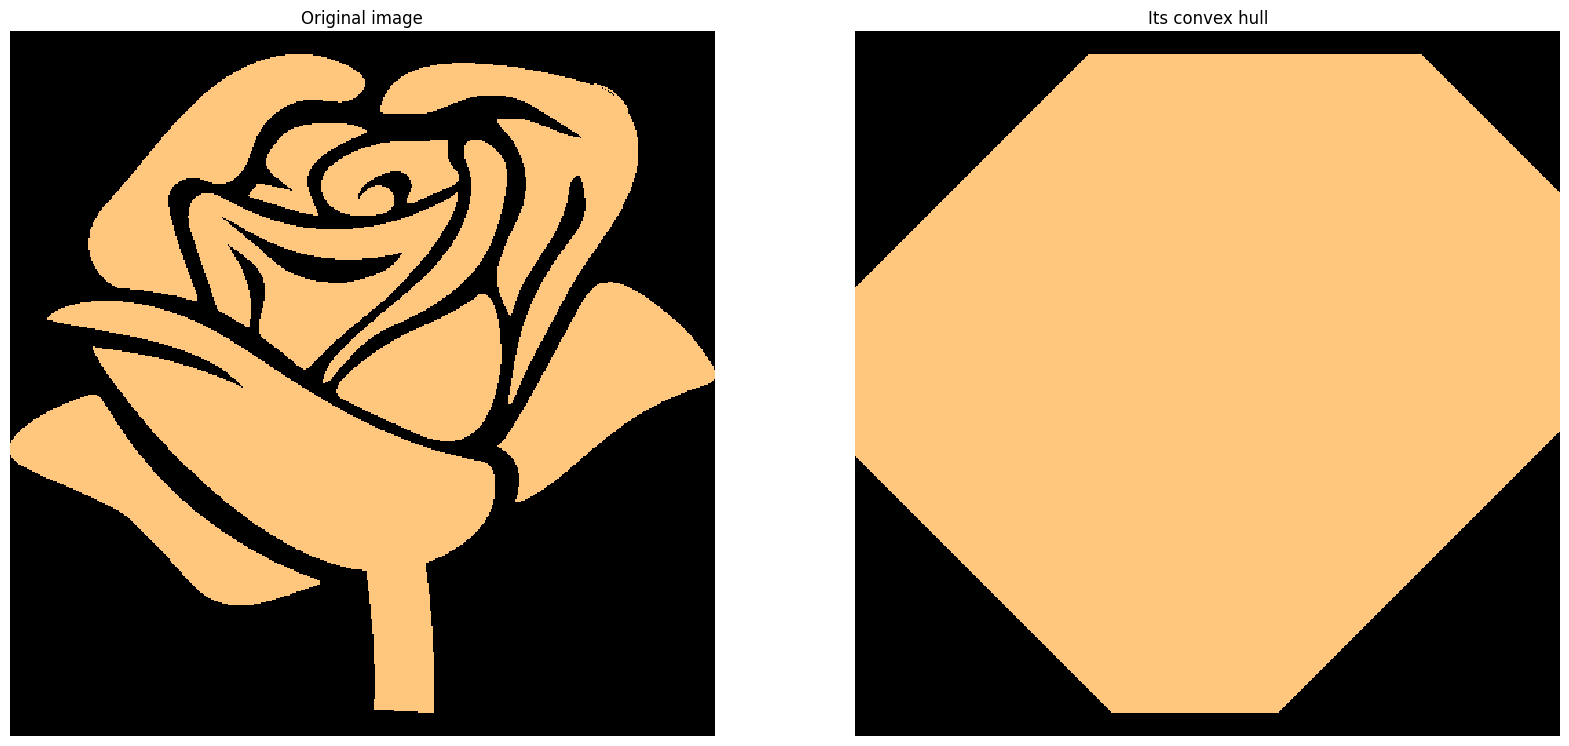

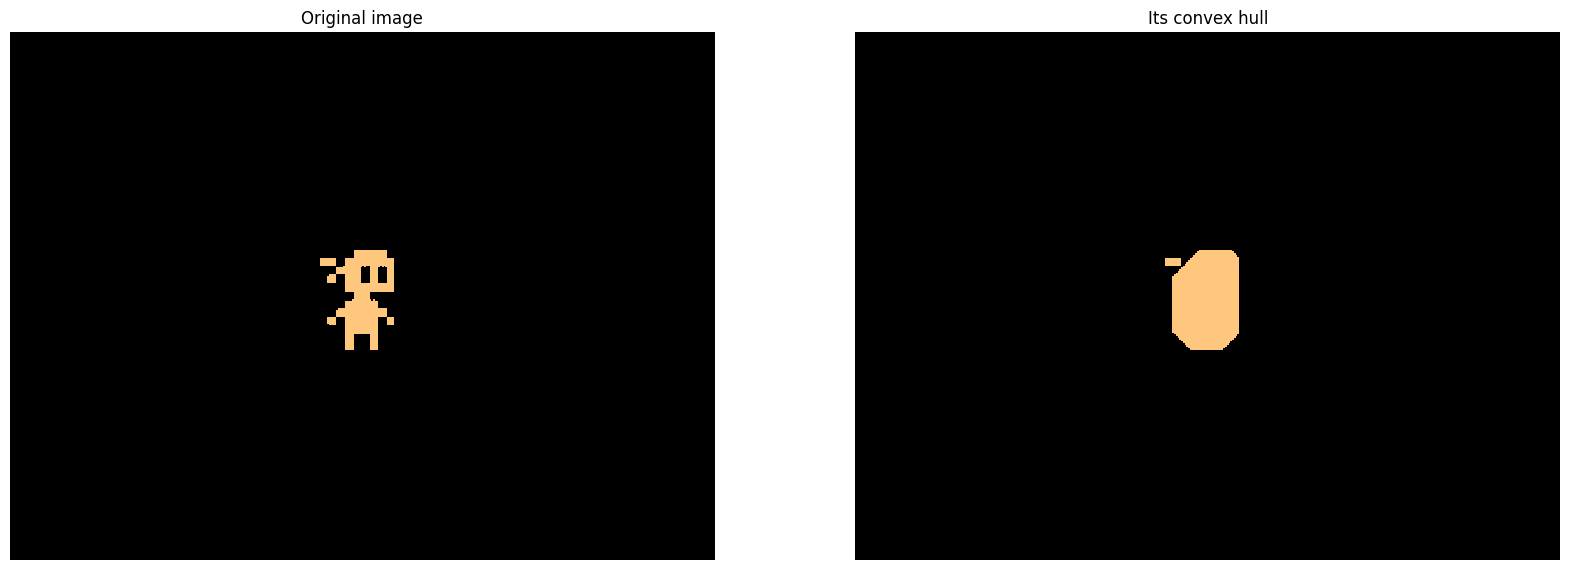

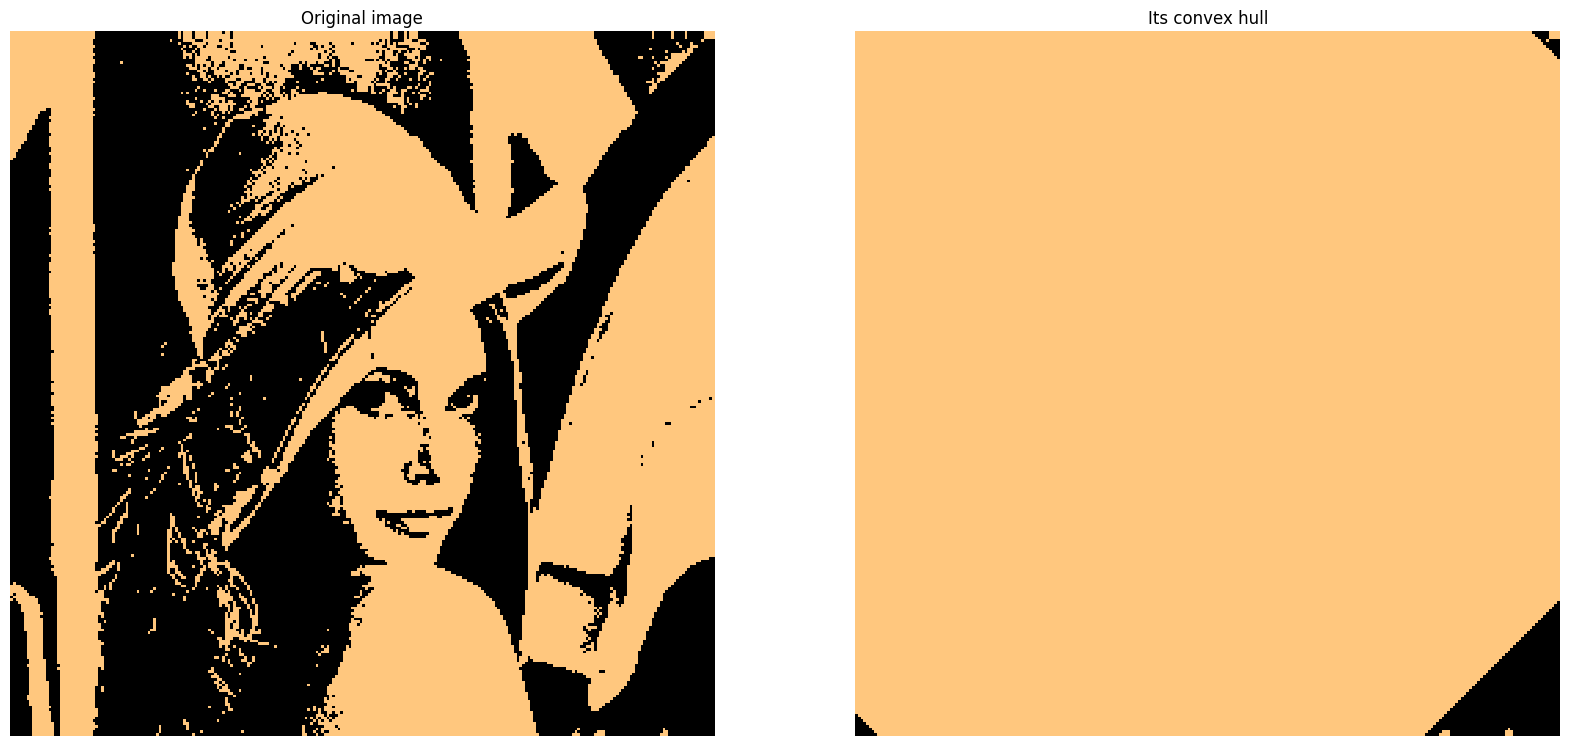

In [52]:
for file in files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img[img == 255] = 1
    convex_hull(img)
